In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

In [45]:
train=[]
for i in range(50):
    train.append(np.random.randint(low=1, high=10, size=2))
train = pd.DataFrame(train)
train.columns =['col1','col2']
train.head()

,col1,col2
0,9,2
1,9,5
2,8,2
3,1,7
4,3,2


In [46]:
#no of cluster
c=2

In [47]:
def distance(x1,x2):
    sum1=0
    for i in range(len(x1)):
        sum1+=(x1[i]-x2[i])**2
    return math.sqrt(sum1)

In [48]:
#find most dissimilar point to other objects in intial cluster.
p=train.values
p=p.tolist()
ind=list(range(len(p)))
cl=[]
cost=[]
for i in ind:
    summ=0
    for j in range(len(p)):
        summ+=distance(p[i],p[j])
    cost.append(summ/len(ind))
cl.append(cost.index(max(cost)))
cl

[25]

In [49]:
# c2 and cl two cluster, main is a list. that contain all the index of data set
p=train.values
p=p.tolist()
ind=list(range(len(p)))
main=list(set(ind)-set(cl))
c2=[]
for i in main:
    summ=0
    for j in main:
        if i!=j:
            summ+=distance(p[i],p[j])
    cost_r=summ/(len(main))
    dis=0
    for k in cl:
        dis+=distance(p[i],p[k])
    cost_c=dis/len(cl)
    if cost_c<cost_r:
        cl.append(i)
    else:
        c2.append(i)
print(cl)

[25, 0, 1, 2, 8, 10, 11, 13, 15, 18, 32, 33, 37, 39, 41, 49]


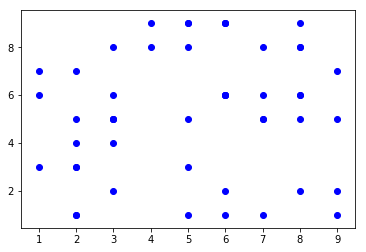

In [50]:
for i in range(len(train)):
    x=train.iloc[i:i+1,0:1].values
    y=train.iloc[i:i+1,1:2].values
    plt.scatter(x[0], y[0], c='blue', label='data')
plt.show()

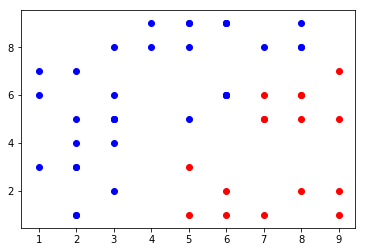

In [51]:
for i in cl:
    plt.scatter(p[i][0], p[i][1], c='r', label='data')

for i in c2:
    plt.scatter(p[i][0], p[i][1], c='blue', label='data')
plt.show()